In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('test_recsys.csv')

# Анализ датасета

In [3]:
data

,sequence
0,['B07HB3B78C' 'B07HB3B78C' 'B07HB3B78C' 'B089L...
1,['B00I3P3BRS' 'B00I3P3DXK' 'B086C24G9G' 'B00I3...
2,['B07VFT4D6B' 'B08CKYFLHQ' 'B076Q6P3TW']
3,['B07H4Q5LFH' 'B0B7S7LBMB' 'B094R3R9XH' 'B0B7S...
4,['B0BD5GYKXP' 'B0B7BBS7D7' 'B0B5XH75H7']
...,...
117556,['B07FX93CG2' 'B07FXP2M63' 'B07FX93CG2' 'B07FX...
117557,['B00B7KSU5Y' 'B00JWVCL8C' 'B00JWVCHF4' 'B00L1...
117558,['B0BDJ37NF5' 'B07S1CM445' 'B09JQZ5DYM']
117559,['B0031TFZRK' 'B0031TFZRK' 'B07DWBBW9H']


In [4]:
data.describe()

,sequence
count,117561
unique,111158
top,['B00I3P3DXK' 'B086C24G9G' 'B00I3P3BRS']
freq,22


In [5]:
data['sequence'].value_counts()

sequence
['B00I3P3DXK' 'B086C24G9G' 'B00I3P3BRS']                                           22
['B00I3P3DXK' 'B086C24G9G' 'B07BC7TDP3']                                           21
['B00I3P3DXK' 'B086C24G9G' 'B01M8III6O']                                           19
['B001B4SARE' 'B001BAYDH4' 'B001B4S3BM']                                           18
['B00I3P3DXK' 'B086C24G9G' 'B00I3P3EJ8']                                           16
                                                                                   ..
['B087G5R55D' 'B087G5R55D' 'B085T9Z6BB' 'B079NM9MQS']                               1
['B073Q1R4RJ' 'B073Q27L9D' 'B078XY9BB4' 'B01NC01X35']                               1
['B08HDJR1KV' 'B07YG61S84' 'B0852W5RR2' 'B09N38LZ9M' 'B0931YVWF4' 'B085L1XG7V']     1
['B079ZT5P2C' 'B09686F47W' 'B081Y1VGG2' 'B010LCKBNW' 'B09FLV5F42']                  1
['B0031TFZRK' 'B0031TFZRK' 'B07DWBBW9H']                                            1
Name: count, Length: 111158, dtype: int64

In [6]:
def split_sequence(sequence: str):
    return sequence.strip('[]').replace("'", "").split()

## преобразование sequence в список

In [7]:
data['sequence'] = data['sequence'].apply(split_sequence)

In [8]:
data['seq_len'] = data['sequence'].apply(len)

In [9]:
data

,sequence,seq_len
0,"[B07HB3B78C, B07HB3B78C, B07HB3B78C, B089LDLP8...",5
1,"[B00I3P3BRS, B00I3P3DXK, B086C24G9G, B00I3P3DX...",6
2,"[B07VFT4D6B, B08CKYFLHQ, B076Q6P3TW]",3
3,"[B07H4Q5LFH, B0B7S7LBMB, B094R3R9XH, B0B7S7LBM...",7
4,"[B0BD5GYKXP, B0B7BBS7D7, B0B5XH75H7]",3
...,...,...
117556,"[B07FX93CG2, B07FXP2M63, B07FX93CG2, B07FXP2M6...",6
117557,"[B00B7KSU5Y, B00JWVCL8C, B00JWVCHF4, B00L15FRWY]",4
117558,"[B0BDJ37NF5, B07S1CM445, B09JQZ5DYM]",3
117559,"[B0031TFZRK, B0031TFZRK, B07DWBBW9H]",3


In [10]:
data['seq_len'].value_counts()

seq_len
3     52535
4     25811
5     14712
6      8648
7      5260
8      3361
9      2173
10     1508
11      980
12      647
13      528
14      345
15      240
16      197
17      146
18      108
19       76
20       56
21       55
23       31
22       30
24       24
25       19
26       11
28       11
27       10
32        8
29        7
30        6
31        4
33        4
34        3
39        2
40        1
44        1
43        1
53        1
38        1
Name: count, dtype: int64

In [11]:
data['seq_len'].mean()

4.545367936645656

<Axes: >

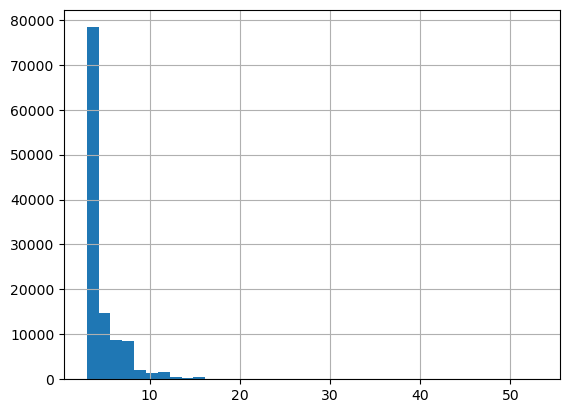

In [12]:
data['seq_len'].hist(bins=data['seq_len'].nunique())

## Посмотрим на частоту товаров

In [13]:
def get_items_series(data: pd.Series):
    items_list = data.to_numpy()
    items_list = np.concatenate(items_list).flatten()
    items_series = pd.Series(items_list)
    return items_series

In [14]:
items_series = get_items_series(data['sequence'])
items_series

0         B07HB3B78C
1         B07HB3B78C
2         B07HB3B78C
3         B089LDLP8W
4         B0924SNP46
             ...    
534353    B0031TFZRK
534354    B07DWBBW9H
534355    B0BGLCCJSN
534356    B0B42Z38BQ
534357    B0B38CH2K4
Length: 534358, dtype: object

In [15]:
items_series.value_counts()

B092323P8M    481
B07PMQDWVP    468
B07PMR72ZG    447
B07SYYQ374    443
B00I3P3DXK    368
             ... 
B0055GVZNK      1
B01ARZUTK8      1
B002LFZ692      1
B083Y6FD6H      1
B07DWBBW9H      1
Name: count, Length: 43033, dtype: int64

# Теперь попробуем несколько подходов к решению задачи

## 1. Коллаборативная фильтрация
### Не будем учитывать последовательность взаимодействий, а просто искать наиболее близких покупателей и рекомендовать то, что взяли они

### Реализуем interaction matrix

### Train-test split

In [16]:
def remove_last_elem(column):
    column = column[:-1]
    return column

In [17]:
test_data = pd.DataFrame(columns=data.columns)

In [18]:
last_elems = [elem[-1] for elem in data['sequence'].to_list()]

In [19]:
test_data['sequence'] = last_elems
test_data['seq_len'] = 1

In [20]:
test_data

,sequence,seq_len
0,B0924SNP46,1
1,B00I3P3CQI,1
2,B076Q6P3TW,1
3,B0B5ND342Y,1
4,B0B5XH75H7,1
...,...,...
117556,B0B3ZYX4MN,1
117557,B00L15FRWY,1
117558,B09JQZ5DYM,1
117559,B07DWBBW9H,1


In [21]:
train_data = data.copy()

In [22]:
train_data['sequence'] = train_data['sequence'].apply(remove_last_elem)

In [23]:
train_data['seq_len'] -= 1
train_data

,sequence,seq_len
0,"[B07HB3B78C, B07HB3B78C, B07HB3B78C, B089LDLP8W]",4
1,"[B00I3P3BRS, B00I3P3DXK, B086C24G9G, B00I3P3DX...",5
2,"[B07VFT4D6B, B08CKYFLHQ]",2
3,"[B07H4Q5LFH, B0B7S7LBMB, B094R3R9XH, B0B7S7LBM...",6
4,"[B0BD5GYKXP, B0B7BBS7D7]",2
...,...,...
117556,"[B07FX93CG2, B07FXP2M63, B07FX93CG2, B07FXP2M6...",5
117557,"[B00B7KSU5Y, B00JWVCL8C, B00JWVCHF4]",3
117558,"[B0BDJ37NF5, B07S1CM445]",2
117559,"[B0031TFZRK, B0031TFZRK]",2


In [24]:
train_data

,sequence,seq_len
0,"[B07HB3B78C, B07HB3B78C, B07HB3B78C, B089LDLP8W]",4
1,"[B00I3P3BRS, B00I3P3DXK, B086C24G9G, B00I3P3DX...",5
2,"[B07VFT4D6B, B08CKYFLHQ]",2
3,"[B07H4Q5LFH, B0B7S7LBMB, B094R3R9XH, B0B7S7LBM...",6
4,"[B0BD5GYKXP, B0B7BBS7D7]",2
...,...,...
117556,"[B07FX93CG2, B07FXP2M63, B07FX93CG2, B07FXP2M6...",5
117557,"[B00B7KSU5Y, B00JWVCL8C, B00JWVCHF4]",3
117558,"[B0BDJ37NF5, B07S1CM445]",2
117559,"[B0031TFZRK, B0031TFZRK]",2


### Поскольку у многих пользователей и так короткая сессионная история, для валидации возьмем последние айтемы только у тех пользователей, у кого последовательность имеет длину не менее 6.

In [25]:
val_data = train_data[train_data['seq_len'] >= 6].copy()
val_data['sequence'] = [elem[-1] for elem in val_data['sequence'].to_list()]
val_data['seq_len'] = 1
val_data['userID'] = val_data.index

In [26]:
train_data['sequence'] = train_data['sequence'].apply(lambda x: x[:-1] if len(x) >= 6 else x)
train_data['seq_len'] = train_data['seq_len'].apply(lambda x: x - 1 if x >= 6 else x)

In [27]:
train_data

,sequence,seq_len
0,"[B07HB3B78C, B07HB3B78C, B07HB3B78C, B089LDLP8W]",4
1,"[B00I3P3BRS, B00I3P3DXK, B086C24G9G, B00I3P3DX...",5
2,"[B07VFT4D6B, B08CKYFLHQ]",2
3,"[B07H4Q5LFH, B0B7S7LBMB, B094R3R9XH, B0B7S7LBM...",5
4,"[B0BD5GYKXP, B0B7BBS7D7]",2
...,...,...
117556,"[B07FX93CG2, B07FXP2M63, B07FX93CG2, B07FXP2M6...",5
117557,"[B00B7KSU5Y, B00JWVCL8C, B00JWVCHF4]",3
117558,"[B0BDJ37NF5, B07S1CM445]",2
117559,"[B0031TFZRK, B0031TFZRK]",2


In [28]:
items_series = get_items_series(data['sequence'])
train_items_series = get_items_series(train_data['sequence'])

In [29]:
item_to_index = {item:i for i, item in enumerate(items_series.unique())}

In [30]:
item_to_index

{'B07HB3B78C': 0,
 'B089LDLP8W': 1,
 'B0924SNP46': 2,
 'B00I3P3BRS': 3,
 'B00I3P3DXK': 4,
 'B086C24G9G': 5,
 'B00I3P3CQI': 6,
 'B07VFT4D6B': 7,
 'B08CKYFLHQ': 8,
 'B076Q6P3TW': 9,
 'B07H4Q5LFH': 10,
 'B0B7S7LBMB': 11,
 'B094R3R9XH': 12,
 'B06XPL43C2': 13,
 'B0B5NBQ387': 14,
 'B0B5ND342Y': 15,
 'B0BD5GYKXP': 16,
 'B0B7BBS7D7': 17,
 'B0B5XH75H7': 18,
 'B07S34XKC6': 19,
 'B07S22T3DR': 20,
 'B07RZYTHT7': 21,
 'B00BW4WAS8': 22,
 'B01AS0PL46': 23,
 'B00BW4W4ES': 24,
 'B089GYML6S': 25,
 'B0B76PNY4S': 26,
 'B08SLR3HW9': 27,
 'B0919TY3P1': 28,
 'B083DC9J5M': 29,
 'B08PFKRZYS': 30,
 'B003E82NG4': 31,
 'B00UAR1MXM': 32,
 'B0BHM7T76K': 33,
 'B09BY84W7H': 34,
 'B00OQSZG6U': 35,
 'B07DHFK73L': 36,
 'B07WBWH12Q': 37,
 'B09GFSKHFR': 38,
 'B09PV3NCCL': 39,
 'B09PFXH97W': 40,
 'B098NL9XWJ': 41,
 'B002BJOD2O': 42,
 'B013ERLQDK': 43,
 'B08H1SL55B': 44,
 'B00EKPVT10': 45,
 'B09XJW2XB4': 46,
 'B09XJTS54R': 47,
 'B0B5Y9LYKM': 48,
 'B07KRL84G5': 49,
 'B00TVNL5JW': 50,
 'B007D7OVBM': 51,
 'B00HP2LFWI': 52,
 '2

In [31]:
interactions = {"userID":  [idx for idx, cur_len in enumerate(train_data['seq_len']) for _ in range(cur_len)], "itemID":train_items_series}

In [32]:
interactions

{'userID': [0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  5,
  5,
  6,
  6,
  6,
  6,
  7,
  7,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  10,
  10,
  10,
  11,
  11,
  12,
  12,
  13,
  13,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  16,
  16,
  16,
  17,
  17,
  17,
  17,
  18,
  18,
  18,
  18,
  18,
  19,
  19,
  20,
  20,
  21,
  21,
  21,
  22,
  22,
  23,
  23,
  23,
  24,
  24,
  25,
  25,
  25,
  26,
  26,
  26,
  26,
  26,
  27,
  27,
  28,
  28,
  29,
  29,
  30,
  30,
  30,
  30,
  31,
  31,
  32,
  32,
  32,
  32,
  32,
  33,
  33,
  34,
  34,
  34,
  34,
  35,
  35,
  36,
  36,
  37,
  37,
  37,
  37,
  38,
  38,
  38,
  38,
  38,
  39,
  39,
  39,
  39,
  39,
  40,
  40,
  40,
  40,
  40,
  41,
  41,
  42,
  42,
  43,
  43,
  43,
  43,
  44,
  44,
  45,
  45,
  46,
  46,
  46,
  47,
  47,
  48,
  48,
  48,
  49,
  49,
  49,
  49,
  49,
  49,
  49,
  49,
  49,
  5

In [33]:
interactions = pd.DataFrame(data=interactions)

In [34]:
interactions

,userID,itemID
0,0,B07HB3B78C
1,0,B07HB3B78C
2,0,B07HB3B78C
3,0,B089LDLP8W
4,1,B00I3P3BRS
...,...,...
400937,117558,B07S1CM445
400938,117559,B0031TFZRK
400939,117559,B0031TFZRK
400940,117560,B0BGLCCJSN


In [35]:
item_counts_per_user = interactions.groupby(by=["userID", "itemID"]).value_counts()
item_counts_per_user

userID  itemID    
0       B07HB3B78C    3
        B089LDLP8W    1
1       B00I3P3BRS    1
        B00I3P3DXK    2
        B086C24G9G    2
                     ..
117558  B07S1CM445    1
        B0BDJ37NF5    1
117559  B0031TFZRK    2
117560  B0B42Z38BQ    1
        B0BGLCCJSN    1
Name: count, Length: 335751, dtype: int64

In [36]:
interactions.drop_duplicates(inplace=True)

In [37]:
interactions["item_counts_per_user"] = item_counts_per_user.to_list()

In [38]:
interactions

,userID,itemID,item_counts_per_user
0,0,B07HB3B78C,3
3,0,B089LDLP8W,1
4,1,B00I3P3BRS,1
5,1,B00I3P3DXK,2
6,1,B086C24G9G,2
...,...,...,...
400936,117558,B0BDJ37NF5,1
400937,117558,B07S1CM445,1
400938,117559,B0031TFZRK,2
400940,117560,B0BGLCCJSN,1


# ALS

In [39]:
interactions

,userID,itemID,item_counts_per_user
0,0,B07HB3B78C,3
3,0,B089LDLP8W,1
4,1,B00I3P3BRS,1
5,1,B00I3P3DXK,2
6,1,B086C24G9G,2
...,...,...,...
400936,117558,B0BDJ37NF5,1
400937,117558,B07S1CM445,1
400938,117559,B0031TFZRK,2
400940,117560,B0BGLCCJSN,1


In [47]:
import scipy
import implicit
from implicit.als import AlternatingLeastSquares

In [51]:
row = interactions['userID'].to_numpy()
col = interactions['itemID'].to_numpy()
data = interactions['item_counts_per_user'].to_numpy()

### Преобразуем ID товара в индекс для создания разреженной interaction matrix

In [52]:
def get_index_by_item(item):
    return item_to_index[item]

vec_func = np.vectorize(get_index_by_item)
col = vec_func(col)

In [53]:
col

array([    0,     1,     3, ..., 10668, 21286, 31986])

In [54]:
interaction_matrix = scipy.sparse.csr_matrix((data, (row, col)))

### Загрузка и обучение модели

In [55]:
from implicit.nearest_neighbours import bm25_weight

interaction_matrix = bm25_weight(interaction_matrix, K1=10, B=0.8)
interaction_matrix = interaction_matrix.tocsr()

In [56]:
model = AlternatingLeastSquares(factors=100, regularization=0.05, alpha=2.0)

C:\Users\user\anaconda3\Lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 6 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()


In [57]:
model.fit(interaction_matrix)

  0%|          | 0/15 [00:00<?, ?it/s]

### Получение предсказаний и оценка метрик

In [97]:
def get_recommendations(userid, model, interaction_matrix, top_k=100, filter=False):
    ids, _ = model.recommend(userid, interaction_matrix[userid], N=top_k, filter_already_liked_items=filter)
    return ids

In [98]:
def single_mrr(item: int, recommendations: list):
    rank = np.where(recommendations == item)[0]
    if len(rank):
        return 1 / (rank[0] + 1)
    return 0


def mrr(users: list, test_data: list, **kwargs):
    mrr = 0
    for i in range(len(users)):
        recommendations = get_recommendations(users[i], **kwargs)
        mrr += single_mrr(test_data[i], recommendations)
    return mrr / len(users)

In [60]:
index_to_item = {value: key for key, value in item_to_index.items()}
index_to_item = pd.DataFrame.from_dict(index_to_item, orient='index')

In [61]:
users = interactions['userID'].unique()
val = val_data['sequence'].apply(get_index_by_item)
test = test_data['sequence'].apply(get_index_by_item)
val

3            14
14           55
15           69
18           83
39          156
          ...  
117521    11464
117541    22642
117542    35217
117545    36286
117551     5564
Name: sequence, Length: 15855, dtype: int64

In [63]:
mrr(val_data['userID'].to_numpy()[:1000], val.to_numpy()[:1000], model=model, interaction_matrix=interaction_matrix)

0.14740189975751422

### Кастомный grid_search (т.к. библиотека не поддерживает метод из sklearn)

In [72]:
params = {
    'K1': [10, 50, 100], 
    'B': [0.5, 0.75, 1.], 
    'factors': [50, 100],
    'regularization': [0.01, 0.05, 0.1],
    'alpha': [1.0, 2.0],
    'iterations': [15, 25, 50]
}

In [73]:
def get_params_combinations(params_dict: dict):
    keys, values = zip(*params_dict.items())
    combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
    return combinations

In [74]:
val_sample = val_data.sample(n=1000)
val_items = val_sample['sequence'].apply(get_index_by_item)
val_sample

,sequence,seq_len,userID
86884,B096ZJYBVF,1,86884
71420,B01FFOY006,1,71420
63594,B008X7I04A,1,63594
35528,B0068M0SAG,1,35528
77205,B08KTNQT5D,1,77205
...,...,...,...
54772,B09SHWTRFL,1,54772
98215,B08Q7YQ6VH,1,98215
110117,B0779B2ZHF,1,110117
957,B00D8WQOB6,1,957


In [75]:
import itertools

best_mrr = 0
best_params = {}

for param_set in get_params_combinations(params):
    current_mrr = 0
    interaction_matrix = bm25_weight(interaction_matrix, K1=param_set['K1'], B=param_set['B'])
    interaction_matrix = interaction_matrix.tocsr()
    model = AlternatingLeastSquares(factors=param_set['factors'], regularization=param_set['regularization'], alpha=param_set['alpha'])
    model.fit(interaction_matrix)
    current_mrr = mrr(val_sample['userID'].to_numpy(), val_items.to_numpy(), 
                      model=model, interaction_matrix=interaction_matrix)
    if current_mrr > best_mrr:
        print('new_best_mrr:', current_mrr)
        best_mrr = current_mrr
        best_params = param_set

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1256380863226994


  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1319129120175226


  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.13258720580340042


  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1427681346694047


  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.14498341304811097


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1528229535930606


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1626749633661317


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.16679951528798112


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.16771990575991919


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.17391175680251078


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.17737744207788197


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1782458400251086


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1805963771541946


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1820518850542374


  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.1984763621130441


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.20055665121076388


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.20493925218948641


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.21272674884283116


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

new_best_mrr: 0.2129120374028744


  0%|          | 0/15 [00:00<?, ?it/s]

### Проверка на тестовой выборке

In [81]:
best_params

{'K1': 100,
 'B': 1.0,
 'factors': 100,
 'regularization': 0.1,
 'alpha': 2.0,
 'iterations': 25}

# MRR

In [87]:
param_set = best_params
model = AlternatingLeastSquares(factors=param_set['factors'], regularization=param_set['regularization'], alpha=param_set['alpha'])
model.fit(interaction_matrix)
current_mrr = mrr(test_data.index.to_numpy(), test.to_numpy(), 
                  model=model, interaction_matrix=interaction_matrix)
print(f'mrr@100: {current_mrr:.3}')

  0%|          | 0/15 [00:00<?, ?it/s]

mrr@100: 0.136


#### Метрика значительно меньше, чем на валидации, но это можно объяснить тем, что в валидационной выборке были пользователи с достаточно большой историей, в то время как в полном датасете около половины имеют только 3 предмета, и для них сложнее строить рекомендации. Тем не менее, таргет в среднем попадает в топ-8 предметов

# NDCG и HitRate

In [88]:
from implicit.evaluation import ndcg_at_k

In [89]:
test_data

,sequence,seq_len
0,B0924SNP46,1
1,B00I3P3CQI,1
2,B076Q6P3TW,1
3,B0B5ND342Y,1
4,B0B5XH75H7,1
...,...,...
117556,B0B3ZYX4MN,1
117557,B00L15FRWY,1
117558,B09JQZ5DYM,1
117559,B07DWBBW9H,1


In [91]:
test_row = test_data.index.to_numpy()
test_col = test_data['sequence'].to_numpy()
test_col = vec_func(test_col)
test_data = np.ones(len(test_row))

In [95]:
test_matrix = scipy.sparse.csr_matrix((test_data, (test_row, test_col)))

# NDCG

In [96]:
ndcg_at_k(model, interaction_matrix, test_matrix, K=100)

  0%|          | 0/117561 [00:00<?, ?it/s]

0.3431832071987708

# HitRate

In [193]:
def single_hit_rate(recommended: np.ndarray, target: int):
    flags = np.isin(recommended, target)
    hit_rate = int(flags.sum() > 0)
    return hit_rate

def hit_rate_by_k(users: list, test_data: list, **kwargs):
    hit_rate = 0
    for i in range(len(users)):
        recommendations = get_recommendations(users[i], **kwargs)
        hit_rate += single_hit_rate(recommendations, test_data[i])
    return hit_rate / len(users)

In [111]:
hit_rate_by_k(test_row, test_col, model=model, interaction_matrix=interaction_matrix, top_k=100)

0.7317647859409158

#### Не для всех, но для большинства пользователей рекомендуются релевантные товары. Если соотнести это с относительно большим показателем mrr, то можно сделать вывод, что рекомендация для конкретного пользователя может работать либо хорошо (таргет в среднем входит в топ-8), либо совсем плохо.

# Байесовский подход

In [137]:
from implicit.cpu.bpr import BayesianPersonalizedRanking

In [178]:
params = {
    'factors': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15], 
    'regularization': [0.01, 0.05, 0.1],
    'iterations': [75, 100, 150]
}

In [182]:
best_mrr = 0
best_params = {}

for param_set in get_params_combinations(params):
    current_mrr = 0
    model = BayesianPersonalizedRanking(factors=param_set['factors'], learning_rate=param_set['learning_rate'],
                                        regularization=param_set['regularization'], iterations=param_set['iterations'])
    model.fit(interaction_matrix)
    current_mrr = mrr(val_sample['userID'].to_numpy(), val_items.to_numpy(), 
                      model=model, interaction_matrix=interaction_matrix)
    if current_mrr > best_mrr:
        print('new_best_mrr:', current_mrr)
        best_mrr = current_mrr
        best_params = param_set

  0%|          | 0/75 [00:00<?, ?it/s]

new_best_mrr: 0.1779994858196939


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

new_best_mrr: 0.1789653066392997


  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

new_best_mrr: 0.17970115162145678


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

new_best_mrr: 0.1894658941240745


  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

### Метрики

In [184]:
mrr(test_row, test_col, 
                  model=model, interaction_matrix=interaction_matrix)

0.10596330993394913

In [185]:
ndcg_at_k(model, interaction_matrix, test_matrix, K=100)

  0%|          | 0/117561 [00:00<?, ?it/s]

0.2454736370461747

In [186]:
hit_rate_by_k(test_row, test_col, model=model, interaction_matrix=interaction_matrix, top_k=100)

0.6751388640790739

# Учет порядка (sequence-based)

Качество можно потенциально улучшить, если использовать RNN, LSTM или трансформеры. Но выходных значений может быть более 40к, и для точных предсказаний нужно гораздо больше обучающих данных. Можно, конечно, использовать скользящее окно контекста размером 3, тогда для последовательности длиной 50 можно получить 47 семплов, но такой маленький размер окна вряд ли даст хороший результат + для половины семплов в обучающей последовательности можно использовать только первый элемент.